<a href="https://colab.research.google.com/github/m10k1/ml-learn/blob/main/ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from io import IncrementalNewlineDecoder

import torch
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import DataLoader
from torchvision.transforms.functional import resize

import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook


# pytorch のバージョン確認
print(torch.__version__)


2.5.1+cu121


In [52]:

transform = transforms.Compose([
    transforms.ToTensor()
])


# データのダウンロード
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [53]:

print(train_dataset.meta)
print(train_dataset.data.shape)

print(train_dataset.targets[:10])

{'filename': 'batches.meta', 'key': 'label_names', 'md5': '5ff9c542aee3614f3951f8cda6e48888'}
(50000, 32, 32, 3)
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


In [54]:
# データローダーの作成

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

classes = train_dataset.classes

# 0番目のミニバッチの画像とラベルを取得
images, labels = train_dataset[0]
print(f"image shape: {images.shape}")
print(f"label: {classes[labels]}")


image shape: torch.Size([3, 32, 32])
label: frog


Class name : frog


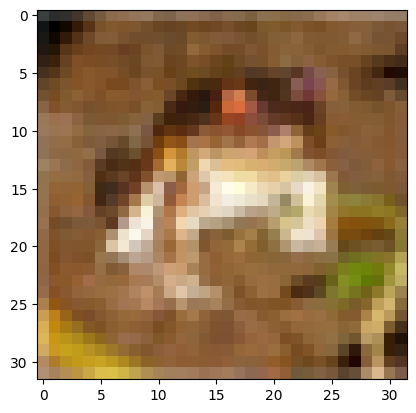

In [55]:

# 画像の表示
# permuteで c h, w ->　h, w, cの順にする
idx = 0
print(f"Class name : {classes[train_dataset[idx][1]]}")
plt.show()
plt.imshow(train_dataset[idx][0].permute(1, 2, 0))


Class name : truck


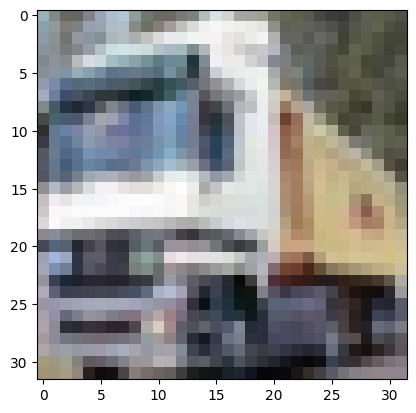

In [56]:
idx = 1
print(f"Class name : {classes[train_dataset[idx][1]]}")
plt.imshow(train_dataset[idx][0].permute(1, 2, 0))

In [57]:
## 低解像度の画像を作成する

In [76]:
from torchvision.transforms.functional import resize

def downsample_image(image, scale_factor):
  low_res = resize(image, [image.shape[1] // scale_factor, image.shape[2] // scale_factor])
  return low_res

# 低解像度画像と高解像度画像のペアを作成
scale_factor = 2  # 解像度倍率

def create_low_high_res_pairs(images, scale_factor):
  low_res_images = [downsample_image(img, scale_factor) for img in images]
  high_res_images = images
  return low_res_images, high_res_images

In [79]:
# train_datasetの画像から低解像度、高解像度の画像を生成
sample_images= [train_dataset[i][0] for i in range(10)]

low_res_images, high_res_images = create_low_high_res_pairs(sample_images, scale_factor)


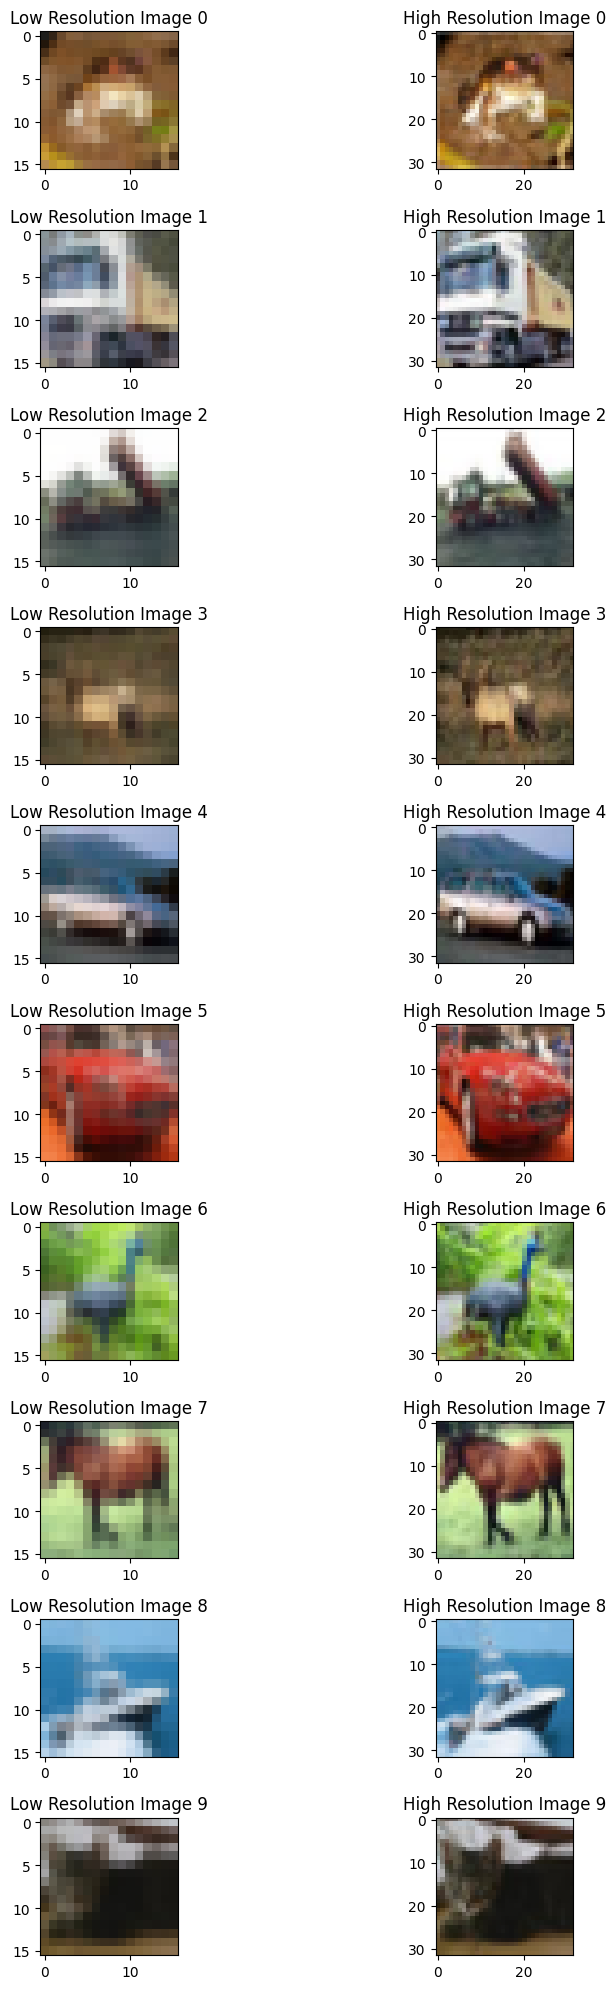

In [80]:
# low_res_imagesとhigh_res_imagesを並べて表示して比較する
# 画像の表示
fig, axes = plt.subplots(nrows=len(low_res_images), ncols=2, figsize=(10, 20))

for i in range(len(low_res_images)):
  axes[i, 0].imshow(low_res_images[i].permute(1, 2, 0))
  axes[i, 0].set_title(f"低解像度 {i}")
  axes[i, 1].imshow(high_res_images[i].permute(1, 2, 0))
  axes[i, 1].set_title(f"高解像度 {i}")

plt.tight_layout()
plt.show()